In [18]:
#!conda install -n mldds -c anaconda joblib
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

Cores:  12


In [8]:
#Feature Selection
#https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
    
#Deep Learning
#!pip3 install keras
# Import necessary modules
import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 12} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

from keras.layers import Dense
from keras.models import Sequential,model_from_json
from keras.utils import to_categorical
#from toto import *
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler





# lresult, dataset = loadTotoData()
# print(lresult)
# print(dataset.head())

In [24]:
import pandas as pd
import numpy as np
from sklearn import utils, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.pyplot import figure
from functools import reduce
import matplotlib.pyplot as plt

class MyTotoResearch:
    
    @classmethod
    def __init__(self, algo_no=0, inputPPFile='../input/PPv3.csv', inputTotoResult='../input/SGH.csv'):
        self.algo_number = algo_no
        print('Loaded MyTotoResearch algo_no: ', self.algo_number)

    @classmethod
    def load_totodata(self, inputPPFile='../input/PPv3.csv', inputTotoResult='../input/SGH.csv'):
        pp = pd.read_csv(inputPPFile)
        lr = pd.read_csv(inputTotoResult)
        print(len(lr))
        cols = ['D', 'N1','N2','N3','N4','N5','N6','N7']
        lr = lr[cols]

        #https://pandas.pydata.org/pandas-docs/stable/merging.html
        df = pd.concat([pp, lr], axis=1, sort=False)
        df = df.dropna()
        df.reset_index().drop(['D'], axis=1)

        cols = ['N1','N2','N3','N4','N5','N6','N7']
        lr = df[cols]

        self.df = df
        self.lresult = np.sort(lr.values[:, ::-1])
        return self.lresult, self.df 
    
    @classmethod
    def modified_dataset ( self, dataset ):
        self.dataset = dataset
        return self.dataset
    
    @classmethod
    def get_result_n(self, col_n):
        aa = np.delete(self.lresult, np.s_[col_n:], axis=1)  
        aa = np.delete(aa, np.s_[0:col_n-1], axis=1)  
        return pd.DataFrame(aa, columns=list('N'))

    @classmethod
    def get_result_n_encoded(self, col_n):
        aa = np.delete(self.lresult, np.s_[col_n:], axis=1)  
        aa = np.delete(aa, np.s_[0:col_n-1], axis=1)  
        # 1. INSTANTIATE
        enc = preprocessing.OneHotEncoder()

        # 2. FIT
        enc.fit(aa)

        # 3. Transform
        onehotlabels = enc.transform(aa).toarray()
        onehotlabels.shape
        #print(onehotlabels)

        #Convert 2d array to Dataframe
        y = pd.DataFrame(aa, columns=list('N'))
        y.head()
        y = aa.astype(int).ravel()
    #    print ( y )
        return y
        
    @classmethod
    def get_test_data(self, file_name = '../input/PPv3-Predict.csv' ):
        self.data2Predict = pd.read_csv(file_name)
        self.data2Predict.reset_index()
        return self.data2Predict
    

    @classmethod
    def plot_history(self, history):
        loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
        val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
        acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
        val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

        if len(loss_list) == 0:
            print('Loss is missing in history')
            return 

        ## As loss always exists
        epochs = range(1,len(history.history[loss_list[0]]) + 1)

        ## Loss
        figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.figure(1)
        for l in loss_list:
            plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
        for l in val_loss_list:
            plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        ## Accuracy
        plt.figure(1)
        for l in acc_list:
            plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
        for l in val_acc_list:    
            plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    @classmethod
    def save_model(self, model, predict_number):
        # serialize model to JSON
        model_json = model.to_json()
        with open(str(self.algo_number) + '_' + str(predict_number) + "_model.json", "w") as json_file:
            json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

        # serialize weights to HDF5
        model.save_weights(str(self.algo_number) + '_' + str(predict_number) + "_model.h5")
        print("Saved model to disk ", self.algo_number, " Predict #N ", predict_number)

    @classmethod
    def print_result(self, predicted_values ):
        test_df = pd.read_csv('../input/TestResult.csv', sep='\s+', header=None, names=['D','N1','N2','N3','N4','N5','N6','N7'])
        test_df['D'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
        test_df['D'] = pd.to_numeric(test_df['D'])

        cols = ['D', 'N1','N2','N3','N4','N5','N6','N7']
        test_df = self.data2Predict.merge(test_df, left_on='D', right_on='D', how='inner')
        test_df = test_df[cols]

        tdfResult = predicted_values.drop(predicted_values.columns[0], axis=1) ;

        actual_result = test_df[cols[1:]].values
        predicted_result = tdfResult.values

        matched = getIntersection(actual_result, predicted_result)

        c = 0
        for i in range(len(matched)):
            print(int(self.data2Predict.loc[i]['D']), ' ', actual_result[i], ' ', predicted_result[i], ' ', matched[c])
            c += 1
        for i in range(c, len(predicted_result)):
            print(int(self.data2Predict.loc[i]['D']), ' Predicted: ', predicted_result[i], ' ')

    @classmethod
    def load_model(self, predict_number):
        json_file = open(str(self.algo_number) + "_" + str(predict_number)+'_model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)

        # load weights into new model
        loaded_model.load_weights(str(self.algo_number) + "_" + str(predict_number)+"_model.h5")
        print("Loaded model from disk " + str(self.algo_number) + "_" + str(predict_number) + "_model" )
        return loaded_model

    @staticmethod
    def getIntersection(p1, p2):
        return [reduce(np.intersect1d, (p.astype(int), a.astype(int))) for (p,a) in zip(p1, p2)]

    @classmethod
    def print_predictions(self, dfPredictions, result='../input/TestResult.csv'):
        #load the test Toto Results files
        test_df = pd.read_csv(result, sep='\s+', header=None, names=['D','N1','N2','N3','N4','N5','N6','N7'])
        test_df['D'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
        test_df['D'] = pd.to_numeric(test_df['D'])

        #Merge the Planet Position File with the Toto Results file
        test_df = self.data2Predict.merge(test_df, left_on='D', right_on='D', how='inner')

        #Extract only the Results for all dates
        cols = ['D', 'N1','N2','N3','N4','N5','N6','N7']
        test_df = test_df[cols]

        tdfResult = dfPredictions.drop(dfPredictions.columns[0], axis=1) ;

        actual_result = test_df[cols[1:]].values
        predicted_result = tdfResult.values

        matched = MyTotoResearch.getIntersection(actual_result, predicted_result)

        c = 0
        for i in range(len(matched)):
            print(int(self.data2Predict.loc[i]['D']), ' ', actual_result[i], ' ', predicted_result[i], ' ', matched[c])
            c += 1
        for i in range(c, len(predicted_result)):
            print(int(self.data2Predict.loc[i]['D']), ' Predicted: ', predicted_result[i], ' ')



def getAdjustedDataF(df,f):
    #Use only Planet Positions Testing
    cols = ['L','M','S', 'R','E','A','V' ,'J','U','K']
    X = df[cols]
    deg = f
    
#     X['S_3'] = X['S'] // (deg*3)
#     X['L_3'] = X['L'] // (deg*3)
#     X['M_3'] = X['M'] // (deg*3)
#     X['R_3'] = X['R'] // (deg*3)
#     X['E_3'] = X['E'] // (deg*3)
#     X['A_3'] = X['A'] // (deg*3)
#     X['V_3'] = X['V'] // (deg*3)
#     X['J_3'] = X['J'] // (deg*3)
#     X['U_3'] = X['U'] // (deg*3)


#     X['S_2'] = X['S'] // (deg*2)
#     X['L_2'] = X['L'] // (deg*2)
#     X['M_2'] = X['M'] // (deg*2)
#     X['R_2'] = X['R'] // (deg*2)
#     X['E_2'] = X['E'] // (deg*2)
#     X['A_2'] = X['A'] // (deg*2)
#     X['V_2'] = X['V'] // (deg*2)
#     X['J_2'] = X['J'] // (deg*2)
#     X['U_2'] = X['U'] // (deg*2)

    X['S_1'] = X['S'] // (deg)
    X['L_1'] = X['L'] // (deg)
    X['M_1'] = X['M'] // (deg)
    X['R_1'] = X['R'] // (deg)
    X['E_1'] = X['E'] // (deg)
    X['A_1'] = X['A'] // (deg)
    X['V_1'] = X['V'] // (deg)
    X['J_1'] = X['J'] // (deg)
    X['U_1'] = X['U'] // (deg)
   
    X = X.drop(cols, axis=1)
    return X



In [35]:
#import MyTotoResearch

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()
dataset = mtr.modified_dataset(getAdjustedDataF(df,1))
#print(dataset)



Loaded MyTotoResearch algo_no:  1
1521


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
print(mtr.get_result_n(1).head())

     N
0  3.0
1  6.0
2  5.0
3  6.0
4  3.0


***  Index(['S_1', 'L_1', 'M_1', 'R_1', 'E_1', 'A_1', 'V_1', 'J_1', 'U_1'], dtype='object')


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


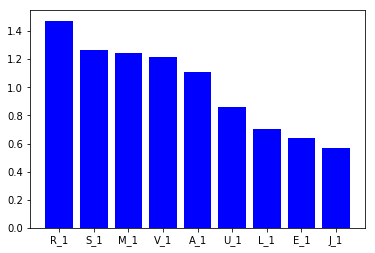

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')
X = dataset
y = mtr.get_result_n(1)

k = 9 # Select 10 features
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)

X_new = selector.transform(X)

print('*** ', X.columns[selector.get_support(indices=True)])

#Plot
# Get the indices sorted by most important to least important
indices = np.argsort(selector.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(k):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure()
plt.bar(features, selector.scores_[indices[range(k)]], color='b', align='center')
plt.show()

Feature ranking:
     importance
S_1    0.148075
E_1    0.126344
A_1    0.123378
L_1    0.117893
V_1    0.117755
M_1    0.108401
J_1    0.098217
R_1    0.080786
U_1    0.079151
1. feature 0 (0.148075)
2. feature 4 (0.126344)
3. feature 5 (0.123378)
4. feature 1 (0.117893)
5. feature 6 (0.117755)
6. feature 2 (0.108401)
7. feature 7 (0.098217)
8. feature 3 (0.080786)
9. feature 8 (0.079151)


/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


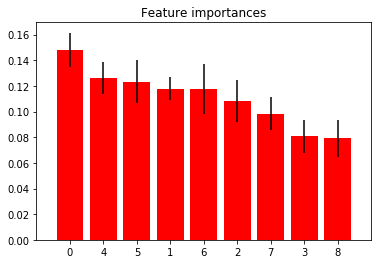

array([0.14807479, 0.11789283, 0.10840097, 0.08078617, 0.12634392,
       0.12337828, 0.11775498, 0.09821717, 0.0791509 ])

In [7]:
#Outlier Detection
def get_rf_feat_importances(X,Y):

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, Y)

    forest = rf
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    feature_importances = pd.DataFrame(rf.feature_importances_, 
                                       index = X.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)

    print(feature_importances)
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    return rf.feature_importances_

X = dataset
y = mtr.get_result_n(1)
get_rf_feat_importances(X, y)



#get_rf_feat_importances(dataset, getDFofN(1))


#print(dataset)

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Use

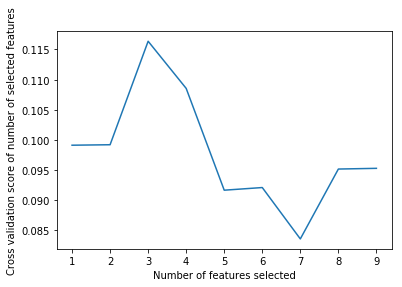

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 0 (0.151237)
2. feature 4 (0.125253)
3. feature 6 (0.124750)
4. feature 5 (0.122797)
5. feature 1 (0.108815)
6. feature 2 (0.108213)
7. feature 7 (0.090985)
8. feature 8 (0.087423)
9. feature 3 (0.080528)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


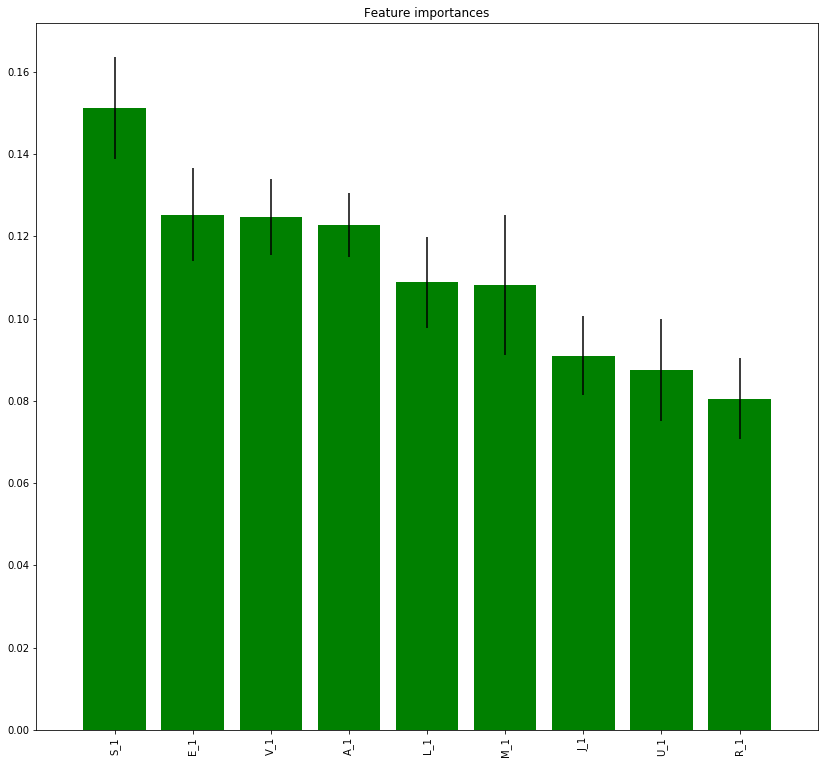

In [10]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
#Choose best 5 using Feature

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=k, step=1)
rfe = rfe.fit(X, y)
print('Chosen best ' + str(k) + ' feature by rfe:',X.columns[rfe.support_])

Chosen best 9 feature by rfe: Index(['S_1', 'L_1', 'M_1', 'R_1', 'E_1', 'A_1', 'V_1', 'J_1', 'U_1'], dtype='object')


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0,0.5,'explained_variance_ratio_')

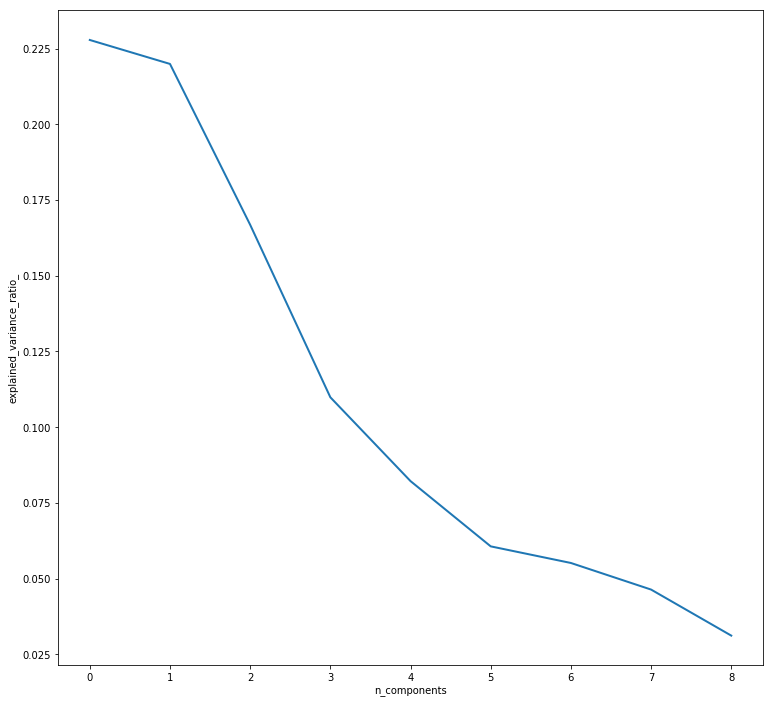

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [14]:
Z = pca.fit_transform(X)


In [15]:
#Linear Regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score 

m_regression = linear_model.LinearRegression()
m_regression.fit(Z,y)
y_pred = m_regression.predict(Z)


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


print("Mean squared error: %.2f" % mean_squared_error(y_pred, y))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

#print("Accuracy Score: ", accuracy_score(y_true=y, y_pred=y_pred) )
print(y_pred)


Mean squared error: 21.60
Variance score: 0.01
[[6.1549617 ]
 [6.03700801]
 [5.95113842]
 ...
 [6.5617224 ]
 [6.43980796]
 [6.35525037]]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

y = mtr.get_result_n(1)

#m_logicstic_regression = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
m_logicstic_regression = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

m_logicstic_regression.fit(X,y)
y_pred = m_logicstic_regression.predict(X)

# Train multinomial logistic regression

print ("Multinomial Logistic regression Train Accuracy ", str(n), ' ', accuracy_score(y_pred, y))
#     print(y_pred)
#     print(y)

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


NameError: name 'n' is not defined

In [10]:
from keras.callbacks import EarlyStopping 

class MyEarlyStopping(EarlyStopping):
    def __init__(self, threshold, **kwargs):
        super(MyEarlyStopping, self).__init__(**kwargs)
        self.threshold = threshold # threshold for validation loss

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn(
                'Early stopping conditioned on metric `%s` '
                'which is not available. Available metrics are: %s' %
                (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
            )
            return

        # implement your own logic here
        if (current >= self.threshold):
            self.stopped_epoch = epoch
            self.model.stop_training = True
            
class MyEarlyStoppingLoss(EarlyStopping):
    def __init__(self, threshold, **kwargs):
        super(MyEarlyStoppingLoss, self).__init__(**kwargs)
        self.threshold = threshold # threshold for validation loss

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn(
                'Early stopping conditioned on metric `%s` '
                'which is not available. Available metrics are: %s' %
                (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
            )
            return

        # implement your own logic here
        if (current <= self.threshold):
            self.stopped_epoch = epoch
            self.model.stop_training = True

In [3]:
from joblib import Parallel, delayed
import multiprocessing
     
# what are your inputs, and what operation do you want to 
# perform on each input. For example...
inputs = range(10) 
def processInput(i):
    return i * i
 
num_cores = multiprocessing.cpu_count()
     
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

ModuleNotFoundError: No module named 'joblib'

Loaded MyTotoResearch algo_no:  1
1521


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Epoch 06946: early stopping
27.45 PredictNumber =  1  Time taken:  667.1196450000002  


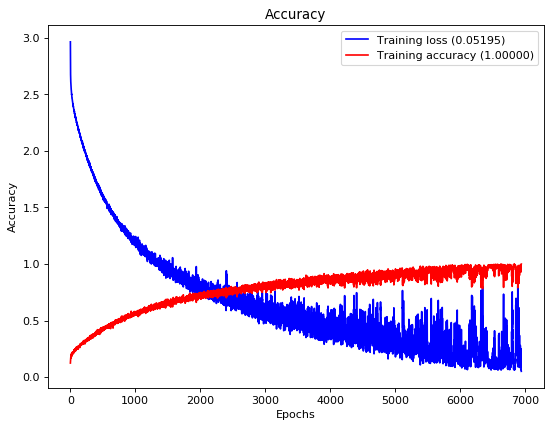

Epoch 05061: early stopping
27.45 PredictNumber =  2  Time taken:  492.9214319999992  


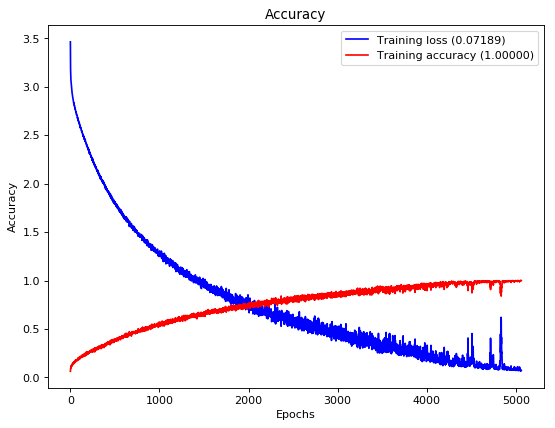

Epoch 03901: early stopping
27.45 PredictNumber =  3  Time taken:  379.63169199999993  


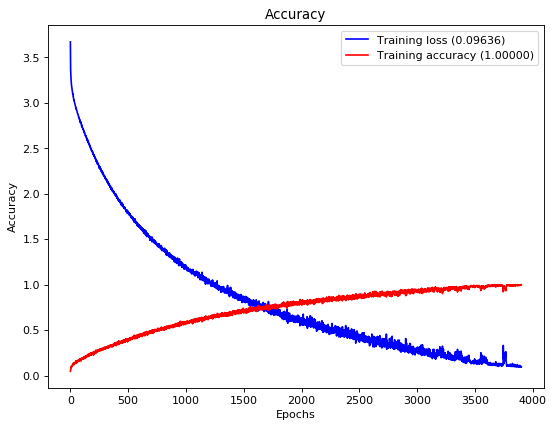

Epoch 04077: early stopping
27.45 PredictNumber =  4  Time taken:  412.6053320000001  


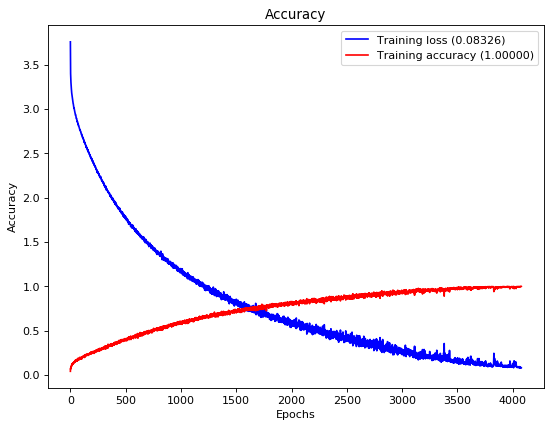

Epoch 04123: early stopping
27.45 PredictNumber =  5  Time taken:  407.59351400000014  


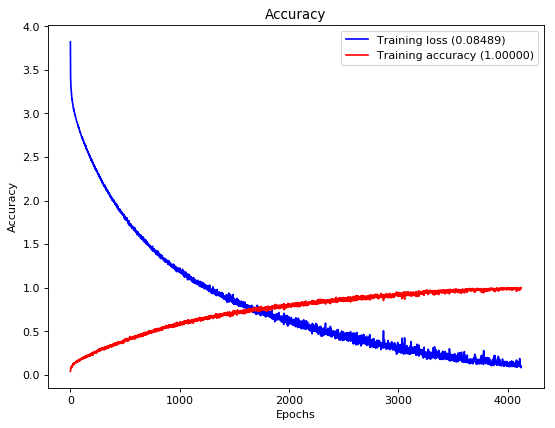

Epoch 04729: early stopping
27.45 PredictNumber =  6  Time taken:  480.49817299999995  


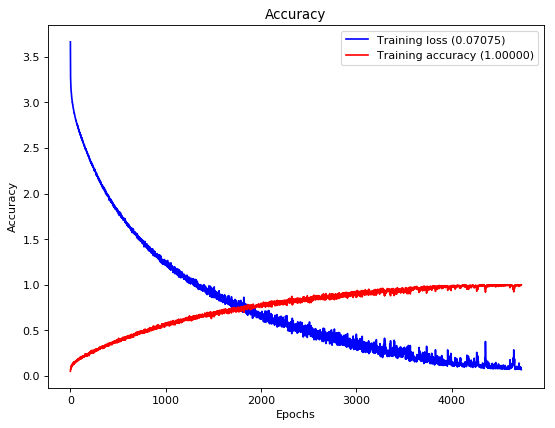

Epoch 05074: early stopping
27.45 PredictNumber =  7  Time taken:  518.5100910000001  


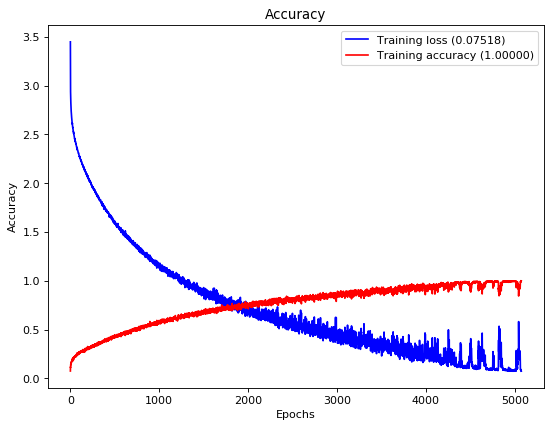

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}}
Sort by keys:
1: {}
2: {}
3: {}
4: {}
5: {}
6: {}
7: {}
Sort by items:
1: {}
2: {}
3: {}
4: {}
5: {}
6: {}
7: {}


In [25]:
#Deep Neuro Network
mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing

early_stopping = MyEarlyStopping ( threshold=.99999, monitor='acc', verbose=1 )
early_stopping_loss = MyEarlyStoppingLoss ( threshold=.005, monitor='loss', verbose=1 )

# Fit the model
#early_stopping = EarlyStopping(patience=10, mode='max')

hist = History()
acc_result = {}

for PredictNumber in range(1, 8):
    acc_dict = {}
    acc_result.update({PredictNumber:acc_dict})
    f = 27.45
    for z in range(1,2):
#        f += 0.01
        X = mtr.modified_dataset(getAdjustedDataF(df,f))
        y = mtr.get_result_n(PredictNumber)
        target = to_categorical(y)

        model = Sequential()
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.00001), input_dim=X.shape[1]))  #input_shape =(1521,)))
#        model.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_dim=X.shape[1]))  #input_shape =(1521,)))

#        model.add(Dense(160, activation='relu'))  #input_shape =(1521,)))

        model.add(Dense(target.shape[1], activation='softmax', input_dim=target.shape[1]))

        model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')
        #model.compile(optimizer='sgd',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

        start = time.clock()
#         print("Processing algo_no = ", alg_no, ' Predict #N ', PredictNumber )

        history = model.fit(X, target, epochs=12000, verbose=0, callbacks=[early_stopping, hist]) #, callbacks=[early_stopping]) #, checkpoint])    
        print(str(f) + " PredictNumber = ", PredictNumber, " Time taken: ", (time.clock() - start),  " ")

        sN = str(z) + "_" + str(f)
#        acc_dict.update({ sN: max(hist.history['acc']) })
#         print(z, ' ')
#            print( history)
#        print( max(hist.history['acc']))

        mtr.plot_history(history)
#        mtr.save_model(model, PredictNumber)
        #mtr.print_result


print(acc_result)

print ('Sort by keys:')
for key in acc_result.keys():
    print ("%s: %s" % (key, acc_result[key]))

print ('Sort by items:')
for key, value in acc_result.items():
    print ("%s: %s" % (key, value))

In [16]:
{1: {'1_27.46': 0.39316239322117486, '2_27.470000000000002': 0.36620644314911394, '3_27.480000000000004': 0.3668639054234133, '4_27.490000000000006': 0.3740959896177622, '5_27.500000000000007': 0.3629191322870587, '6_27.51000000000001': 0.3760683761663456, '7_27.52000000000001': 0.3635765944829824, '8_27.530000000000012': 0.3734385272944781, '9_27.540000000000013': 0.3813280739492684}}
Sort by keys:
1: {'1_27.46': 0.39316239322117486, '2_27.470000000000002': 0.36620644314911394, '3_27.480000000000004': 0.3668639054234133, '4_27.490000000000006': 0.3740959896177622, '5_27.500000000000007': 0.3629191322870587, '6_27.51000000000001': 0.3760683761663456, '7_27.52000000000001': 0.3635765944829824, '8_27.530000000000012': 0.3734385272944781, '9_27.540000000000013': 0.3813280739492684}
Sort by items:
1: {'1_27.46': 0.39316239322117486, '2_27.470000000000002': 0.36620644314911394, '3_27.480000000000004': 0.3668639054234133, '4_27.490000000000006': 0.3740959896177622, '5_27.500000000000007': 0.3629191322870587, '6_27.51000000000001': 0.3760683761663456, '7_27.52000000000001': 0.3635765944829824, '8_27.530000000000012': 0.3734385272944781, '9_27.540000000000013': 0.3813280739492684}

    
    
{1: {'1_27.310000000000002': 0.3740959894904018, '2_27.320000000000004': 0.3767258384014571, '3_27.330000000000005': 0.3740959894904018, '4_27.340000000000007': 0.38658777122274973, '5_27.35000000000001': 0.37738330051900526, '6_27.36000000000001': 0.367521367619337, '7_27.37000000000001': 0.383300460243131, '8_27.380000000000013': 0.3714661408340672, '9_27.390000000000015': 0.37146614097122455, '10_27.400000000000016': 0.38395792242925786, '11_27.410000000000018': 0.3754109138822493, '12_27.42000000000002': 0.3806706114594361, '13_27.43000000000002': 0.376068376078173, '14_27.440000000000023': 0.3806706114986239, '15_27.450000000000024': 0.391847468907703, '16_27.460000000000026': 0.36357659435562206, '17_27.470000000000027': 0.367521367619337, '18_27.48000000000003': 0.374753451990031, '19_27.49000000000003': 0.3734385275981835}}
Sort by keys:
1: {'1_27.310000000000002': 0.3740959894904018, '2_27.320000000000004': 0.3767258384014571, '3_27.330000000000005': 0.3740959894904018, '4_27.340000000000007': 0.38658777122274973, '5_27.35000000000001': 0.37738330051900526, '6_27.36000000000001': 0.367521367619337, '7_27.37000000000001': 0.383300460243131, '8_27.380000000000013': 0.3714661408340672, '9_27.390000000000015': 0.37146614097122455, '10_27.400000000000016': 0.38395792242925786, '11_27.410000000000018': 0.3754109138822493, '12_27.42000000000002': 0.3806706114594361, '13_27.43000000000002': 0.376068376078173, '14_27.440000000000023': 0.3806706114986239, '15_27.450000000000024': 0.391847468907703, '16_27.460000000000026': 0.36357659435562206, '17_27.470000000000027': 0.367521367619337, '18_27.48000000000003': 0.374753451990031, '19_27.49000000000003': 0.3734385275981835}
Sort by items:
1: {'1_27.310000000000002': 0.3740959894904018, '2_27.320000000000004': 0.3767258384014571, '3_27.330000000000005': 0.3740959894904018, '4_27.340000000000007': 0.38658777122274973, '5_27.35000000000001': 0.37738330051900526, '6_27.36000000000001': 0.367521367619337, '7_27.37000000000001': 0.383300460243131, '8_27.380000000000013': 0.3714661408340672, '9_27.390000000000015': 0.37146614097122455, '10_27.400000000000016': 0.38395792242925786, '11_27.410000000000018': 0.3754109138822493, '12_27.42000000000002': 0.3806706114594361, '13_27.43000000000002': 0.376068376078173, '14_27.440000000000023': 0.3806706114986239, '15_27.450000000000024': 0.391847468907703, '16_27.460000000000026': 0.36357659435562206, '17_27.470000000000027': 0.367521367619337, '18_27.48000000000003': 0.374753451990031, '19_27.49000000000003': 0.3734385275981835} 
    

AttributeError: 'History' object has no attribute 'history'

In [36]:
print(df['N1'].value_counts()>3)

df[df['N1'].value_counts()>3]
df[df['N2'].value_counts()>3]
df[df['N3'].value_counts()>3]
df[df['N4'].value_counts()>3]
df[df['N5'].value_counts()>3]
df[df['N6'].value_counts()>3]
df[df['N7'].value_counts()>3]




1.0      True
2.0      True
3.0      True
4.0      True
5.0      True
6.0      True
7.0      True
8.0      True
9.0      True
11.0     True
10.0     True
13.0     True
12.0     True
14.0     True
17.0     True
16.0     True
15.0     True
18.0     True
20.0     True
22.0     True
24.0     True
21.0     True
19.0     True
25.0     True
23.0    False
26.0    False
31.0    False
27.0    False
35.0    False
29.0    False
28.0    False
Name: N1, dtype: bool


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [26]:
#Predict 
mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()
test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAdjustedDataF(test_data,27.45))

dfResult = pd.DataFrame(test_data['D'])
for PredictNumber in range(1, 8):
    # load json and create model
    loaded_model = mtr.load_model(PredictNumber)
    loaded_model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')
    predictions = loaded_model.predict_classes(X)

    s = 'N' +str(PredictNumber)
    dfPN = pd.DataFrame({s:np.argmax(to_categorical(predictions), axis = 1)})
    dfResult = pd.concat([dfResult, dfPN], axis=1)


mtr.print_predictions(dfResult)


Loaded MyTotoResearch algo_no:  1
1521


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loaded model from disk 1_1_model
Loaded model from disk 1_2_model
Loaded model from disk 1_3_model
Loaded model from disk 1_4_model
Loaded model from disk 1_5_model
Loaded model from disk 1_6_model
Loaded model from disk 1_7_model
20180514   [17 24 29 45 46 49  5]   [ 1 16 21 22 24 25 27]   [24]
20180517   [ 7 21 25 29 35 37 13]   [ 6 16 17 34 40 44 48]   []
20180521   [ 8 10 16 30 37 44 17]   [ 2  6  9 15 18 40 43]   []
20180524   [11 25 26 34 36 42 16]   [ 2 15 17 20 23 30 45]   []
20180528   [ 5  9 27 28 30 44  2]   [ 3  4  5 13 18 39 40]   [5]
20180531   [11 13 24 26 47 49 33]   [ 3  9 27 29 31 40 46]   []
20180604   [20 22 31 37 43 45 27]   [ 5  6 16 24 26 29 38]   []
20180607   [12 20 29 31 37 39 42]   [ 2  3 19 23 30 39 41]   [39]
20180611   [16 25 30 37 44 49 34]   [ 2  9 10 25 38 40 42]   [25]
20180614   [ 4 29 31 35 42 48  1]   [20 22 23 25 32 33 36]   []
20180618   [11 15 22 23 26 43 25]   [ 1  3  6 16 17 22 36]   [22]
20180621   [ 4  6 15 24 30 35 46]   [13 16 20 23 28 39 4

In [ ]:
21	25	27	36	39	44


#Epoch 3000

20181001   [11 15 23 24 32 40 43]   [ 5 10 31 24 30 37 49]   [24]
20181004   [ 5 12 23 32 37 42 43]   [ 6 10 18 24 30 37 49]   [37]
20181008   [17 18 23 39 43 49  2]   [10  4 15 21 33 36 36]   []
20181011   [ 1 16 18 24 29 46 35]   [10  4 23 21 33 36 36]   []
20181015   [ 1  4 24 32 35 48 20]   [10  4 20 21 33 36 36]   [ 4 20]
20181018   [ 5 14 17 31 46 48 47]   [10  7 20 21 33 36 36]   []
20181022   [ 5 22 24 40 43 48  2]   [10 13 20 24 37 35 36]   [24]
20181025   [ 7  8 13 15 35 48 30]   [ 2  5  9 21 33 36 45]   []
20181029   [ 2  6 10 20 28 31 30]   [ 2  6  9 21 33 36 45]   [2 6]
20181101   [ 6 27 28 41 44 48 15]   [ 2  6 15 21 33 36 36]   [ 6 15]
20181105   [ 3  8 14 28 43 49 26]   [10 12 15 21 33 36 36]   []
20181108   [ 8 13 16 26 28 38 46]   [10 12 23 21 33 36 36]   []
20181112   [ 4 12 21 34 41 47 33]   [10  4 20 21 33 36 36]   [ 4 21 33]
20181115  Predicted:  [10 21 20 27 37 36 36]  
20181119  Predicted:  [ 1 15 12 25 27 34 46]  
20181122  Predicted:  [ 4 28 27 30 31 46 47]  
20181126  Predicted:  [ 4 11 37 23 44 28 40]  
20181129  Predicted:  [ 4 11  9 23 44 28 46]  
20181203  Predicted:  [11 12  9 23 35 28 46]  
20181206  Predicted:  [ 5  4 24 32 45 28 49]  
20181210  Predicted:  [ 5 22 24 32 26 46 46]  
20181213  Predicted:  [17 22 24 34 26 35 49]  
20181217  Predicted:  [ 7 22 20 34 41 42 47]  
20181220  Predicted:  [ 2 11 31 27 40 32 49]  
20181224  Predicted:  [ 5  9 20 13 40 37 49]  
20181227  Predicted:  [ 5 14 18 21 15 48 49]  
20181231  Predicted:  [ 5 14 23 32 45 28 40]  
    
print ('Sort by keys:')
for key in acc_result.keys():
    print ("%s: %s" % (key, acc_result[key]))

print ('Sort by items:')
for key, value in acc_result.items():
    print ("%s: %s" % (key, value))